In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maajdl/yeh-concret-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'yeh-concret-data' dataset.
Path to dataset files: /kaggle/input/yeh-concret-data


In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from seaborn import pairplot
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd
df = pd.read_csv("Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [18]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


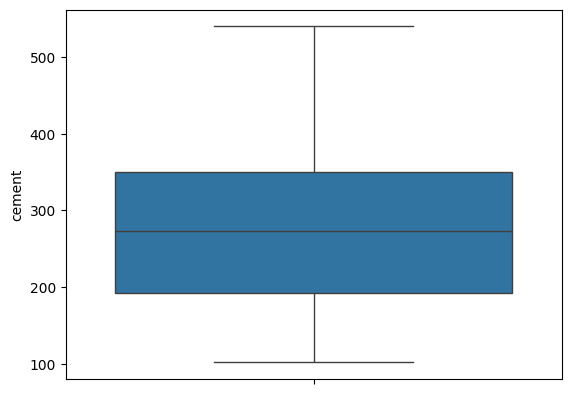

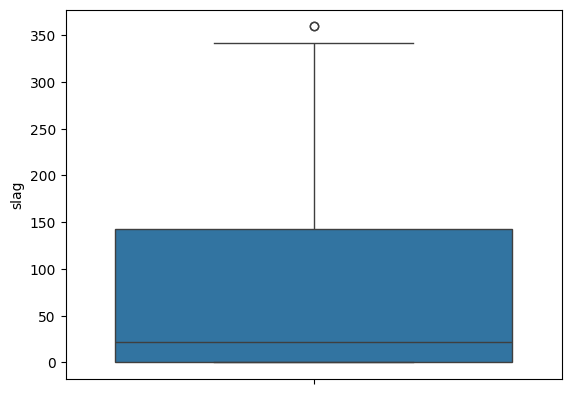

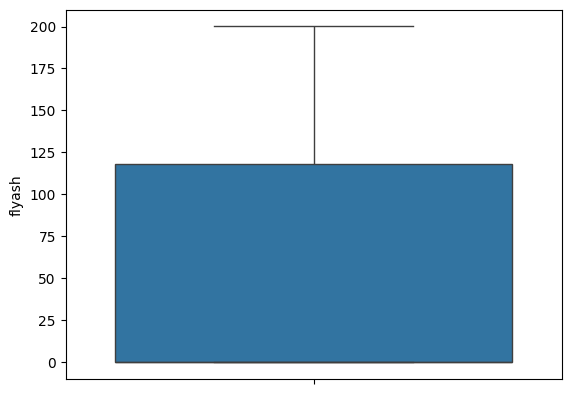

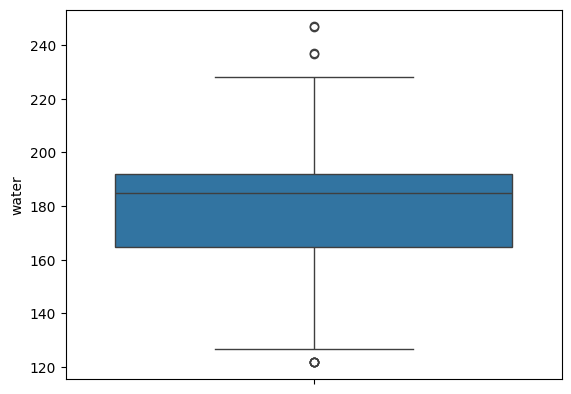

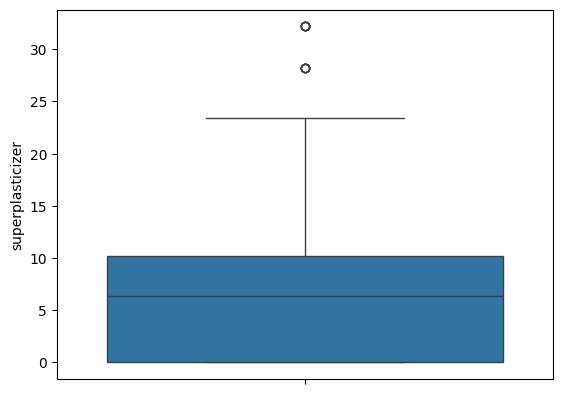

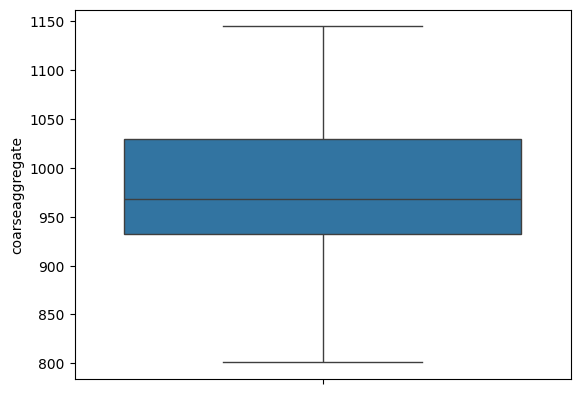

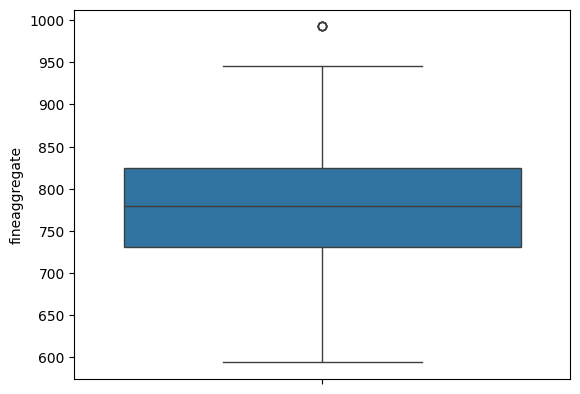

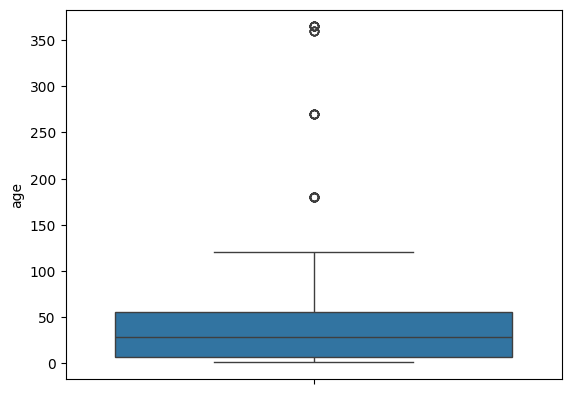

In [26]:
for i in df.columns[:-1]:
        sns.boxplot(df[i])
        plt.show()


In [32]:
for i in df.columns[:-1]:
  df[i] = df[i].clip(lower=df[i].quantile(0.25),upper=df[i].quantile(0.75))

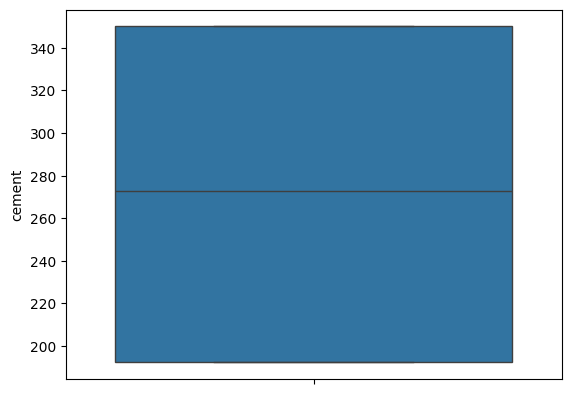

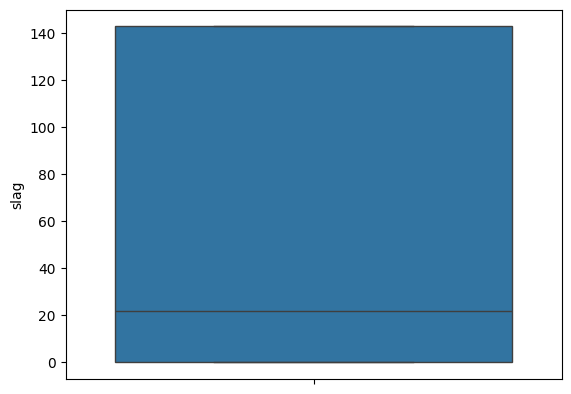

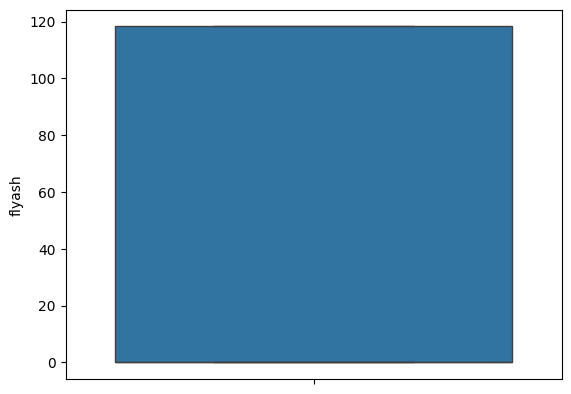

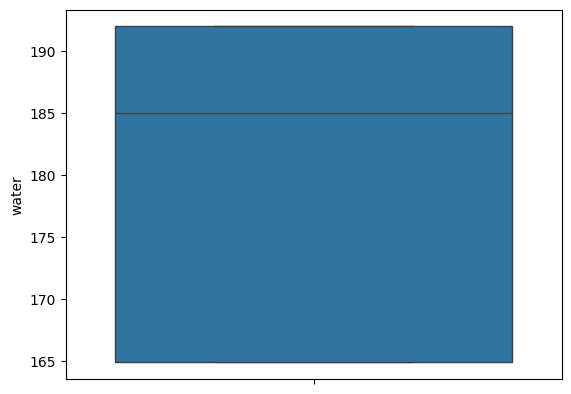

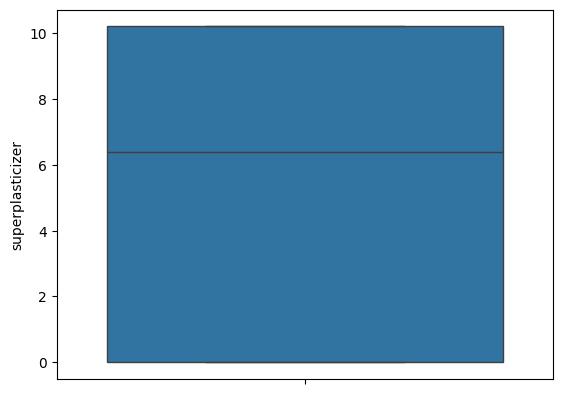

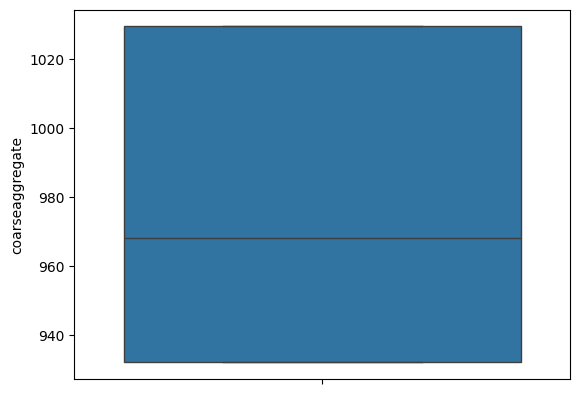

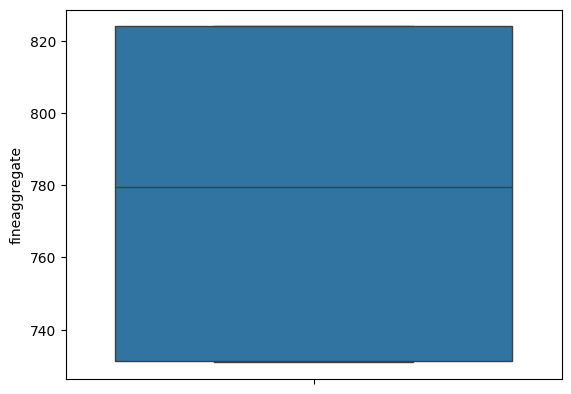

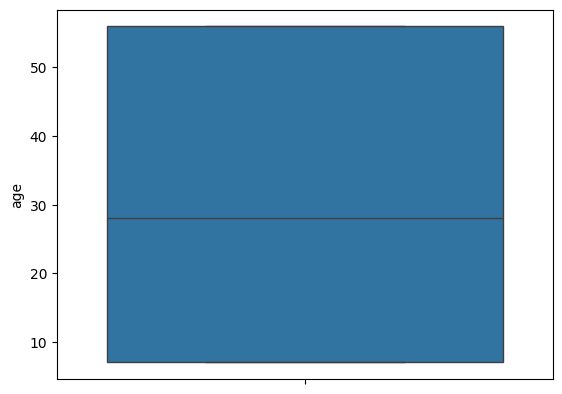

In [33]:
for i in df.columns[:-1]:
        sns.boxplot(df[i])
        plt.show()

<Axes: >

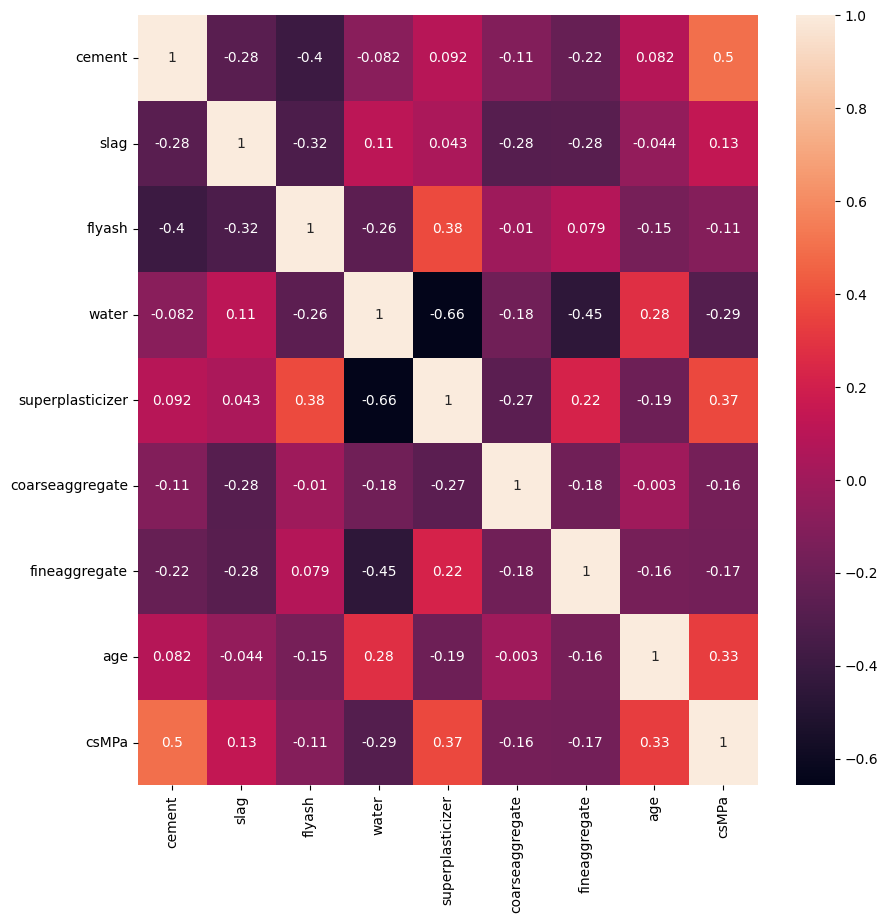

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
x = df.drop("csMPa",axis=1)
y = df["csMPa"]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
model = XGBRegressor(n_estimator=100,learning_rate=0.1,max_depth=3,colsample_bytree=0.8)

In [35]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:00:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=100,
             n_estimators=None, n_jobs=None, ...)

In [36]:
pred = model.predict(x_test)

In [37]:
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

In [38]:
print(f"the mse is {mse:.2f}")

the mse is 27.89


In [39]:
print(f"the R2 is {r2:.2f}")

the R2 is 0.89


In [41]:
import pickle
with open("Concreate_data.pkl","wb") as f:
        pickle.dump(model,f)